# Adding Average Route Time (actual_elapsed_time)

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [14]:
my_path = "C:/Users/user/lighthouse/Midterm_Project/Predicting_Flight_Delays/workbench/"
df = pd.read_csv(my_path +'feature_2.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,origin,dest,taxi_out,taxi_in,month,day_of_week,carrier_encoded,haul_encoded,binned_dep,binned_arr,binned_distance,route,average_route_time,arr_delay
0,46,297,20.0,4.0,5,4,3,2,5,6,1,672,125.024174,-14.0
1,21,290,12.0,2.0,7,6,3,2,8,8,1,255,125.024174,-14.0
2,21,83,34.0,3.0,3,5,3,2,4,4,1,167,125.024174,13.0
3,184,320,22.0,8.0,9,0,3,1,3,4,2,2941,125.024174,-18.0
4,86,240,25.0,2.0,8,2,3,2,6,6,1,1249,125.024174,11.0


# Setting x and y values

In [15]:
X = df.drop('arr_delay',axis=1)
y = df['arr_delay']

# Lasso = Feature Importance

Lasso picked 8 variables and eliminated the other 5 variables


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+04, tolerance: 4.758e+04
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Feature importance using Lasso Model')

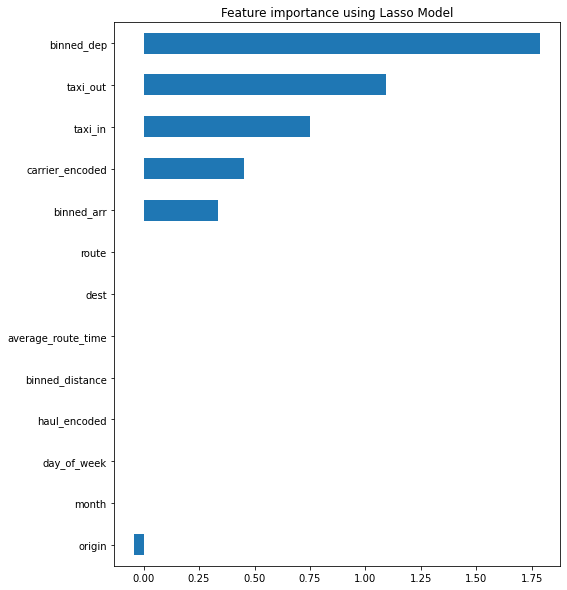

In [16]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

import matplotlib.pyplot as plt
import matplotlib
imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Splitting of data

In [17]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Lasso Regression

In [18]:
reg = LassoCV()
reg.fit(X, y)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print('RSME: ',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('R2: ',r2_score(y_test, pred_test_lasso))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+04, tolerance: 4.758e+04
  model = cd_fast.enet_coordinate_descent(


RSME:  44.47022312820537
R2:  0.07650240065562952


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+08, tolerance: 3.500e+04
  model = cd_fast.enet_coordinate_descent(


# Ridge Regression

In [19]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print('RSME: ',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('R2: ',r2_score(y_test, pred_test_rr))

RSME:  44.47015405394614
R2:  0.076505269535457


# XGBoost

In [20]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 15, alpha = 10, n_estimators = 200)
xg_reg.fit(X_test,y_test)
y_pred_xgb = xg_reg.predict(X_test)
print('Model RMSE is: ',np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('Model R2 Score is: ',r2_score(y_test,y_pred_xgb))

Model RMSE is:  22.23465626154664
Model R2 Score is:  0.7691350551763397


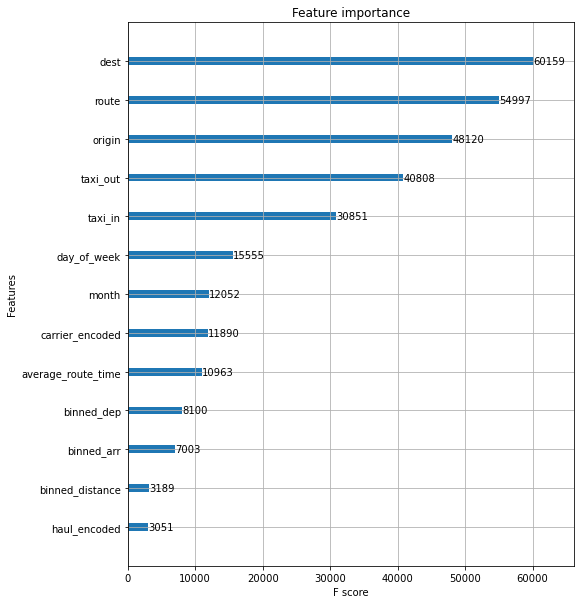

In [21]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_RF = rf.predict(X_test)
from sklearn import metrics
print('R2 score:',r2_score(y_test, y_pred_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))

R2 score: -0.013406597815441845
RMSE: 46.58469826274991
